In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

##a) (i). Loading MNIST dataset and doing data preparation.

In [ ]:
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()  # split dataset into training and test set while loading it

In [ ]:
print(x_train_images.shape)
print(y_train_labels.shape)
print(x_test_images.shape)
print(y_test_labels.shape)
type(x_train_images)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


numpy.ndarray

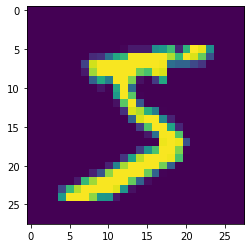

In [ ]:
plt.imshow(x_train_images[0])

In [ ]:
#converting to 2dimensional numpy array
x_train_images = x_train_images.reshape((-1,784))
x_test_images = x_test_images.reshape((-1,784))

In [ ]:
#converted into 2D
print('X_train_labels shape: {}'.format(x_train_images.shape))
print('Y_train_labels shape: {}'.format(y_train_labels.shape))
print('X_test_labels shape: {}'.format(x_test_images.shape))
print('Y_test_labels shape: {}'.format(y_test_labels.shape))

X_train_labels shape: (60000, 784)
Y_train_labels shape: (60000,)
X_test_labels shape: (10000, 784)
Y_test_labels shape: (10000,)


In [ ]:
type(x_train_images)

numpy.ndarray

###As the computational time is very high for such a large dataset,we are again doing train_test_split of training dataset i.e. 60k entries so as to reduce the total data points and computational time as well.

In [ ]:
# Use StandardScaler to normalize df_x_train and df_x_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_images = x_train_images/255.0                           #normalise value earlier.
scaled_x_train = scaler.fit_transform(x_train_images)
type(scaled_x_train)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x_train, y_train_labels, test_size=0.3, random_state=30)

###Finally we got our final dataset with shape as follows:

In [ ]:
#after splitting traning dataset to sub sample X_train and y_train.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

(42000, 784)
(42000,)
(18000, 784)
(18000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##a) (i) build a linear SVM classifier i.e. SVC ( Support Vector Classifier)

In [ ]:
svc_classifier = SVC(kernel='linear')  
svc_classifier.fit(X_train, y_train)  

SVC(kernel='linear')

##(ii) Prediction of first 20 values and display confusion matrix.

In [ ]:
temp = []
for i in range(20):
  temp.append(svc_classifier.predict(X_test[i].reshape(1,-1))[0])

data = {'y_train': y_test[:20], 
        'y_prediction': temp}

prediction = pd.DataFrame(data)
prediction

,y_train,y_prediction
0,9,9
1,2,2
2,0,0
3,1,1
4,6,6
5,5,5
6,4,4
7,9,9
8,6,6
9,3,3


In [ ]:
y_pred = svc_classifier.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',matrix )

Confusion Matrix: 
 [[1672    0    9    2    3   22    9    1    8    3]
 [   1 1988   11    3    2    4    1    5   16    4]
 [  23   23 1613   34   22    8   16   13   21    4]
 [   6    6   39 1685    1   47    3   14   37   17]
 [   4    4   20    1 1653    6    7   14    6   49]
 [  10    7   13   63   17 1416   29    1   28   12]
 [  10    5   29    1   20   24 1648    0    5    0]
 [   3   11   23   15   24    4    0 1766    4   65]
 [  21   30   43   43    7   51   10    9 1553   22]
 [   5   10   11   17   78   14    0   58   10 1595]]


##a) (iii) Classwise f1 score 

In [ ]:
def classwise_f1_score():
  classwise_score = []
  for i in range(len(matrix)):
    preision_sum = 0
    recall_sum = 0
    for j in range(len(matrix[0])):
      preision_sum += matrix[j][i]

    for k in range(len(matrix[0])):
      recall_sum += matrix[i][k]
      
    precision_of_class_i = matrix[i][i] / preision_sum
    recall_of_class_i = matrix[i][i] / recall_sum

    f1_score_of_i = (2*precision_of_class_i*recall_of_class_i) / (precision_of_class_i+recall_of_class_i)
    classwise_score.append(f1_score_of_i)

  return classwise_score

In [ ]:
class_score = {'class': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'f1-score': classwise_f1_score()}
scores = pd.DataFrame(class_score)
scores

,class,f1-score
0,0,0.959816
1,1,0.965283
2,2,0.899108
3,3,0.906158
4,4,0.920635
5,5,0.887218
6,6,0.951227
7,7,0.930453
8,8,0.893299
9,9,0.893808


In [ ]:
#F1 scores using sklearn inbuilt function and comparing f1 score to our own function.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1729
           1       0.95      0.98      0.97      2035
           2       0.89      0.91      0.90      1777
           3       0.90      0.91      0.91      1855
           4       0.90      0.94      0.92      1764
           5       0.89      0.89      0.89      1596
           6       0.96      0.95      0.95      1742
           7       0.94      0.92      0.93      1915
           8       0.92      0.87      0.89      1789
           9       0.90      0.89      0.89      1798

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



###Conclusion: The value of F1 scores derived by sklearn inbuilt function and as returned by my function is almost same and the accuracy of my model is 92%.

##b) Non Linear SVM

###RBF Kernal

In [ ]:
rbf_classifier = SVC(kernel='rbf')  
rbf_classifier.fit(X_train, y_train) 
y_pred = rbf_classifier.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy with RBF kernal: {}'.format(rbf_accuracy))

Accuracy with RBF kernal: 96.26666666666667


###Polynomial Kernal

In [ ]:
poly_classifier = SVC(kernel='poly')  
poly_classifier.fit(X_train, y_train) 
y_pred_poly = poly_classifier.predict(X_test)
poly_accuracy = accuracy_score(y_test, y_pred_poly)*100
print('Accuracy with Polynomial kernal: {}'.format(poly_accuracy))

Accuracy with Polynomial kernal: 95.66111111111111


##c) Perform (grid search) cross-validation to find the optimal values of cost C and gamma for SVM classifier using RBF kernel.

In [ ]:
type(X_train)
type(y_train)
print(y_train.shape)

(42000, 1)


In [ ]:
#doing dimensionality reduction using PCA as it is taking a lot of computational time in grid search
pca = PCA(n_components= 0.75)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('After PCA the shape of our X_train : {}'.format(X_train_pca.shape))
print('After PCA the shape of our X_test : {}'.format(X_test_pca.shape))

After PCA the shape of our X_train : (42000, 113)
After PCA the shape of our X_test : (18000, 113)


In [ ]:
type(X_train_pca)

numpy.ndarray

In [ ]:
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.01],
              'kernel': ['rbf'],
              } 
  
grid = GridSearchCV(SVC(), param_grid, verbose = -1, cv=2)
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.01], 'kernel': ['rbf']},
             verbose=-1)

In [ ]:
print("The optimal parameters are: ", grid.best_params_)

The optimal parameters are:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


##d) Using the optimal hyperparameters train the model and report accuracy. Display the confusion matrix and report the accuracy of the model.

In [ ]:
from sklearn.metrics import accuracy_score

prediction_optimize = grid.predict(X_test_pca)
optimal_accuracy=accuracy_score(y_test, prediction_optimize)
print('Using optimal hyperparameters, the accuracy is : {}'.format(optimal_accuracy*100))

Using optimal hyperparameters, the accuracy is : 93.00555555555555


In [ ]:
optimal_matrix = confusion_matrix(y_test, prediction_optimize)
print('Confusion Matrix: \n',optimal_matrix )

Confusion Matrix: 
 [[1637    0   78    1    2    1    7    0    2    1]
 [   1 1989   27    3    4    1    1    3    4    2]
 [   3    1 1749    6    4    0    2    6    4    2]
 [   0    1  136 1682    0    8    0    9   12    7]
 [   0    3  122    0 1613    1   10    2    1   12]
 [   0    0   77   15    1 1489    7    2    3    2]
 [   3    1  134    0    2    6 1594    0    2    0]
 [   0    5  164    1    7    0    0 1726    1   11]
 [   3    6  117   16    7   14    2    6 1617    1]
 [   2    2  102   10   13    1    0   18    5 1645]]


##e) (i) Develop a new training set by extracting the support vectors from the SVM fitted above for the chosen hyperparameters. 


In [ ]:
# get support vectors
SV_x = grid.best_estimator_.support_vectors_                #returns numpy array
print('\nThe shape of new dataset that is derived by extracting support vectors from SVM: {}'.format(SV_x.shape))


The shape of new dataset that is derived by extracting support vectors from SVM: (19334, 113)


In [ ]:
# get indices of support vectors so we need to extract labels from y_train with those indexes.

indexes = grid.best_estimator_.support_              #returns numpy array
indexes = list(indexes)                              #converting to list

y_train = pd.DataFrame(y_train)
SV_y=y_train[y_train.index.isin(indexes)]           #converting to dataframe as isin() is applied on dataframe only
SV_y= SV_y.to_numpy()                               #converting again to numpy as rest all are in numpy.

print('The shape of new dataset that is derived by extracting support vectors from SVM: {}'.format(SV_y.shape))

The shape of new dataset that is derived by extracting support vectors from SVM: (19334, 1)


##(ii) Now fit another SVM with the new training set and report the accuracies(train, test).


####Deriving new training and test dataset using the Support Vectors found earlier and after that we will report our accuracies.

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(SV_x, SV_y, test_size=0.3, random_state=30)

In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(13533, 113)
(5801, 113)
(13533, 1)
(5801, 1)


In [ ]:
classifier_new = SVC(kernel='rbf', C=1, gamma=0.01)               # building SVC object with optimal hyperparameters
classifier_new.fit(X_train_new, y_train_new)

SVC(C=1, gamma=0.01)

In [ ]:
pred_test_new = classifier_new.predict(X_test_new)
acc_score_test = accuracy_score(y_test_new,pred_test_new)
print(acc_score_test*100)

13.842440958455438


In [ ]:
pred_train_new = classifier_new.predict(X_train_new)
acc_score_train = accuracy_score(y_train_new,pred_train_new)
print(acc_score_train*100)

91.21406931205203


In [ ]:
# initialize data of lists.
data = {'Dataset': ['Training Set', 'Test Set'],
        'Accuracy': [acc_score_train*100, acc_score_test*100]}
  
table = pd.DataFrame(data, index=['1)', '2)'])
table

,Dataset,Accuracy
1),Training Set,91.214069
2),Test Set,13.842441


##(iii) Compare the accuracies with the previous models. State your observations.

1) Accuracy of Linear SVM Classifier:  92%

2) Accuracy with Non Linear SVM Classifier (RBF kernal): 96.26%

3) Accuracy with Non Linear SVM Classifier (Polynomial kernal): 95.66%

4) Accuracy Using optimal hyperparameters (RBF kernal): 93.00%



The reason behind the decreament of accuracy after using the optimal hyperparameters is because of the use of PCA which reduces the dimension of the dataset. I applied PCA because it was not running for the entire dataset.



